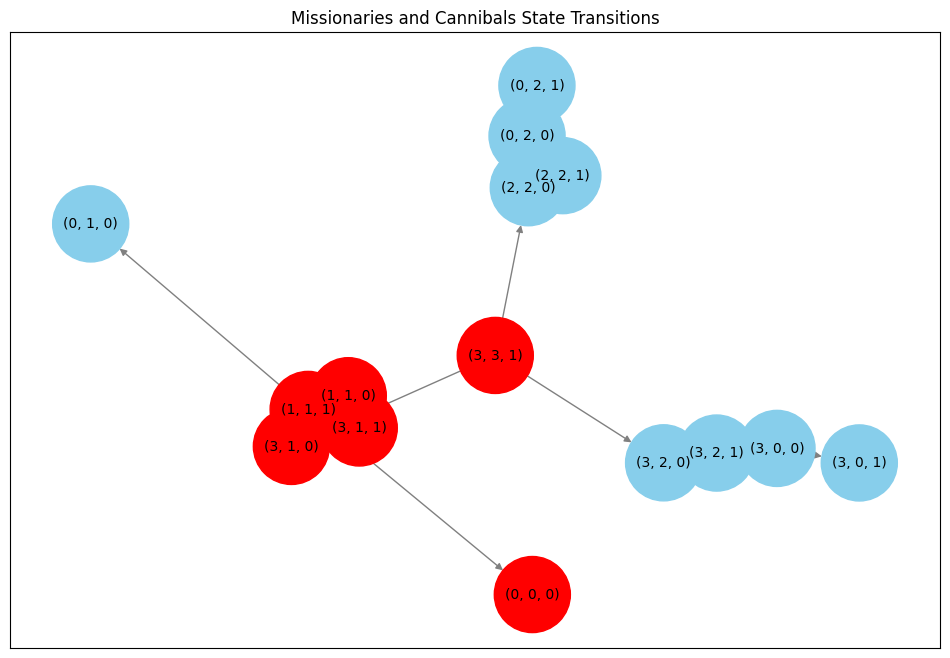

Solution: [(3, 3, 1), (3, 1, 0), (3, 1, 1), (1, 1, 0), (1, 1, 1), (0, 0, 0)]


In [8]:
from collections import deque
import matplotlib.pyplot as plt
import networkx as nx

def is_valid_state(state):
    m, c, _ = state
    return (0 <= m <= 3 and 0 <= c <= 3) and (m == 0 or m >= c) and (3-m == 0 or 3-m >= 3-c)

def bfs_missionaries_cannibals_with_visualization():
    start_state = (3, 3, 1)
    goal_state = (0, 0, 0)
    queue = deque([(start_state, [])])
    visited = set()
    graph = nx.DiGraph()

    while queue:
        (current_state, path) = queue.popleft()
        if current_state in visited:
            continue
        visited.add(current_state)
        graph.add_node(current_state)
        if path:
            graph.add_edge(path[-1], current_state)

        if current_state == goal_state:
            # Extract the solution path
            solution_path = path + [goal_state]

            # Use spring layout for better node spacing
            pos = nx.spring_layout(graph, seed=42)  # Seed for consistent layout
            plt.figure(figsize=(12, 8))  # Adjust figure size

            # Color nodes: green for solution path, blue for others
            node_colors = [
                "red" if node in solution_path else "skyblue" for node in graph.nodes()
            ]

            # Draw the graph with custom node colors
            nx.draw_networkx(
                graph, pos, with_labels=True, font_size=10, node_size=3000,
                node_color=node_colors, edge_color="gray"
            )

            plt.title("Missionaries and Cannibals State Transitions")
            plt.show()
            return solution_path

        m, c, b = current_state
        moves = [(1, 0), (2, 0), (0, 1), (0, 2), (1, 1)]
        for move in moves:
            new_m, new_c = m - b * move[0], c - b * move[1]
            new_state = (new_m, new_c, 1 - b)
            if is_valid_state(new_state):
                queue.append((new_state, path + [current_state]))

    return None

solution = bfs_missionaries_cannibals_with_visualization()
print("Solution:", solution)


Final Cost: 268.11
Total Iterations: 11


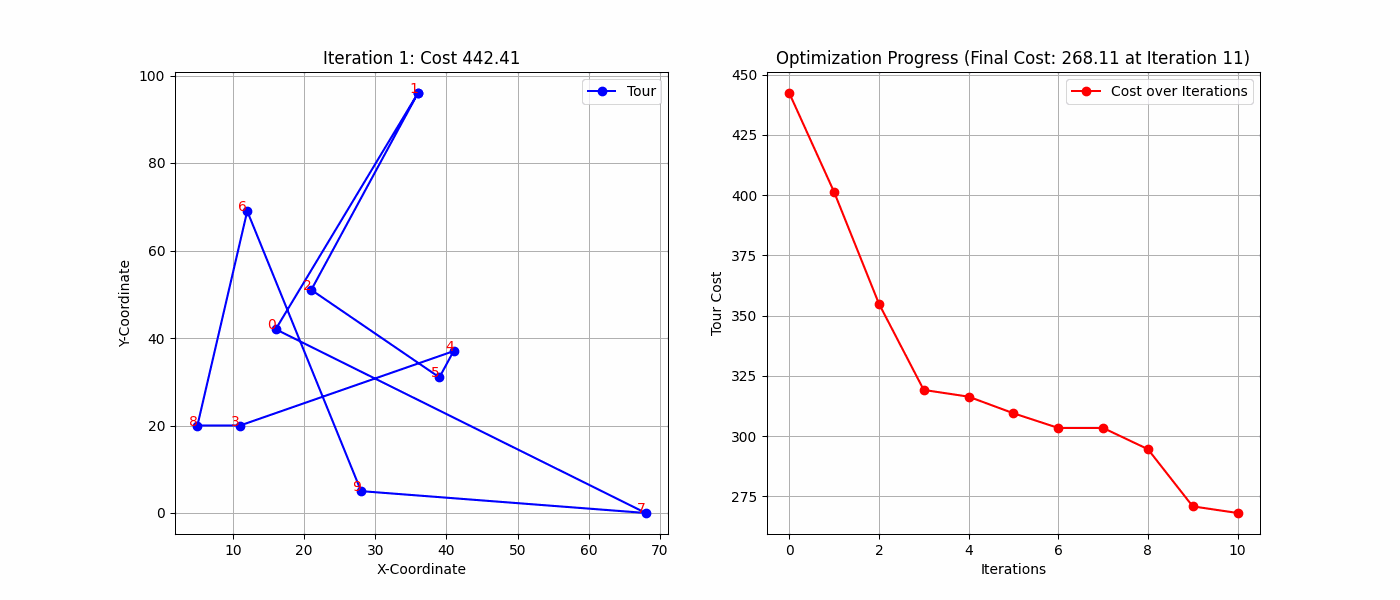

In [15]:
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, Image

def distance(c1, c2):
    return ((c1[0] - c2[0]) ** 2 + (c1[1] - c2[1]) ** 2) ** 0.5

def total_distance(tour, coordinates):
    return sum(distance(coordinates[tour[i]], coordinates[tour[i - 1]]) for i in range(len(tour)))

def tsp_hill_climbing_with_gif(coordinates):
    n = len(coordinates)
    current_tour = list(range(n))
    random.shuffle(current_tour)
    current_cost = total_distance(current_tour, coordinates)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    costs = [current_cost]
    frames = []

    def plot_tour(tour, ax, title):
        ax.clear()
        x, y = zip(*[coordinates[city] for city in tour + [tour[0]]])  # Close the tour loop
        ax.plot(x, y, 'b-o', label="Tour")
        for i, (x_coord, y_coord) in enumerate(coordinates):
            ax.text(x_coord, y_coord, str(i), fontsize=10, ha="right", color="red")
        ax.set_title(title)
        ax.set_xlabel("X-Coordinate")
        ax.set_ylabel("Y-Coordinate")
        ax.legend()
        ax.grid(True)

    def hill_climbing():
        nonlocal current_tour, current_cost
        while True:
            neighbor_found = False
            for i in range(n):
                for j in range(i + 1, n):
                    new_tour = current_tour[:]
                    new_tour[i:j] = reversed(new_tour[i:j])  # 2-opt swap
                    new_cost = total_distance(new_tour, coordinates)
                    if new_cost < current_cost:
                        current_tour, current_cost = new_tour, new_cost
                        costs.append(new_cost)
                        frames.append(current_tour[:])  # Save the tour for visualization
                        neighbor_found = True
            if not neighbor_found:
                break

    def update(frame_idx):
        ax1.clear()
        plot_tour(frames[frame_idx], ax1, f"Iteration {frame_idx + 1}: Cost {costs[frame_idx]:.2f}")
        ax2.clear()
        ax2.plot(range(len(costs)), costs, 'r-', marker='o', label="Cost over Iterations")
        ax2.set_title(f"Optimization Progress (Final Cost: {costs[-1]:.2f} at Iteration {len(costs)})")
        ax2.set_xlabel("Iterations")
        ax2.set_ylabel("Tour Cost")
        ax2.legend()
        ax2.grid(True)

    hill_climbing()

    # Final summary
    print(f"Final Cost: {current_cost:.2f}")
    print(f"Total Iterations: {len(costs)}")

    # Create animation and save it as a GIF
    anim = FuncAnimation(fig, update, frames=len(frames), interval=500, repeat=False)
    gif_path = "tsp_animation.gif"
    anim.save(gif_path, writer="pillow")

    # Display the GIF in Colab
    plt.close(fig)
    return gif_path

coordinates = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(10)]
gif_path = tsp_hill_climbing_with_gif(coordinates)

# Display the saved GIF
Image(filename=gif_path)
